[View in Colaboratory](https://colab.research.google.com/github/ts-kim/models/blob/master/VGG.ipynb)

In [1]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 592.3MB 39.2MB/s 


In [2]:
!pip3 install torchvision

    100% |████████████████████████████████| 61kB 3.9MB/s 
    100% |████████████████████████████████| 2.0MB 7.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [4]:
torch.cuda.is_available()

True

cuda 사용


In [25]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 ship   car  bird plane plane
torch.Size([30, 3, 32, 32]) torch.Size([30])


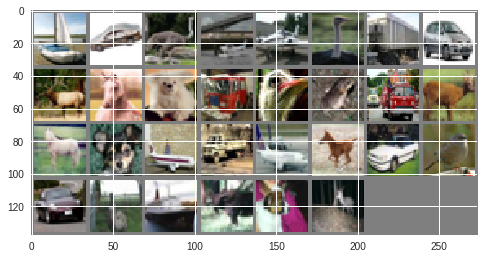

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))
print(images.shape, labels.shape)

In [0]:
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1) 
        self.conv2 = nn.Conv2d(64, 64, 3,padding = 1) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3,padding = 1)
        self.conv4 = nn.Conv2d(128, 128, 3,padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3,padding = 1)
        self.conv6 = nn.Conv2d(256, 256, 3,padding = 1)
        self.conv7 = nn.Conv2d(256, 512, 3,padding = 1)
        self.conv8 = nn.Conv2d(512, 512, 3,padding = 1)
        self.fc = nn.Linear(512, 512)

    def forward(self, x):
        x = self.pool(self.conv2(self.conv1(x))) # 16 16 64
        x = self.pool(self.conv4(self.conv3(x))) # 8 8 128
        x = self.pool(self.conv6(self.conv6(self.conv5(x)))) # 4 4 256
        x = self.pool(self.conv8(self.conv8(self.conv7(x)))) # 2 2 512
        x = self.pool(self.conv8(self.conv8(self.conv8(x)))) # 1 1 512 
        x = x.view(-1, 512)
        for i in range(3):
          x = self.fc(x)
        return x


net = VGGNet().cuda()


In [0]:
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(net.parameters(), lr = 0.0003)

In [26]:
from torch.autograd import Variable  
lossdict = ()
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
      
        # forward + backward + optimize
        outputs = net(Variable(inputs))
        labels = Variable(labels)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        # print statistics
        if i % 20 == 19:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/20))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 0.866
[1,    40] loss: 1.000
[1,    60] loss: 0.955
[1,    80] loss: 0.947
[1,   100] loss: 0.937
[1,   120] loss: 0.955
[1,   140] loss: 0.892
[1,   160] loss: 0.964
[1,   180] loss: 0.888
[1,   200] loss: 0.893
[1,   220] loss: 0.932
[1,   240] loss: 0.926
[1,   260] loss: 0.811
[1,   280] loss: 0.989
[1,   300] loss: 0.933
[1,   320] loss: 0.916
[1,   340] loss: 0.927
[1,   360] loss: 0.929
[1,   380] loss: 0.880
[1,   400] loss: 0.917
[1,   420] loss: 0.966
[1,   440] loss: 0.881
[1,   460] loss: 0.880
[1,   480] loss: 0.916
[1,   500] loss: 0.914
[1,   520] loss: 0.932
[1,   540] loss: 0.934
[1,   560] loss: 0.931
[1,   580] loss: 0.904
[1,   600] loss: 0.907
[1,   620] loss: 0.912
[1,   640] loss: 0.872
[1,   660] loss: 0.847
[1,   680] loss: 0.929
[1,   700] loss: 0.894
[1,   720] loss: 0.921
[1,   740] loss: 0.879
[1,   760] loss: 0.931
[1,   780] loss: 0.898
[1,   800] loss: 0.864
[1,   820] loss: 0.909
[1,   840] loss: 0.860
[1,   860] loss: 0.910
[1,   880] 

[2,   860] loss: 0.868
[2,   880] loss: 0.828
[2,   900] loss: 0.824
[2,   920] loss: 0.808
[2,   940] loss: 0.829
[2,   960] loss: 0.799
[2,   980] loss: 0.820
[2,  1000] loss: 0.805
Finished Training


RuntimeError: ignored

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog


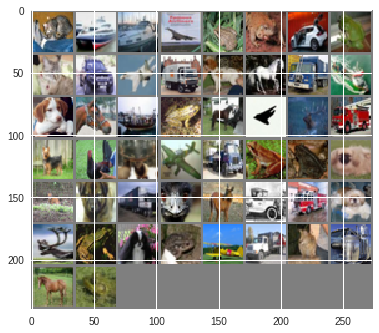

In [27]:

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(50)))

In [30]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %
